In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the data
data = pd.read_csv('CreditCardData.csv')

In [3]:
data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [4]:
data['Type of Transaction'].value_counts()

Online    33481
ATM       33274
POS       33245
Name: Type of Transaction, dtype: int64

In [5]:
online_data=data[data['Type of Transaction']=='Online']
online_data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
6,#3652 191,13-Oct-20,Tuesday,18,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,13-Oct-20,Tuesday,18,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
16,#3513 029,13-Oct-20,Tuesday,0,MasterCard,CVC,£25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
17,#3173 400,14-Oct-20,Wednesday,21,Visa,CVC,£242,Online,Services,United Kingdom,United Kingdom,United Kingdom,M,62.0,Barlcays,0


In [6]:
online_data.shape

(33481, 16)

In [7]:
online_data.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    3
Type of Transaction       0
Merchant Group            5
Country of Transaction    0
Shipping Address          2
Country of Residence      0
Gender                    2
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [8]:
online_data.dropna(inplace=True)

C:\Users\Windows User\AppData\Local\Temp\ipykernel_400\3575859064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_data.dropna(inplace=True)


In [9]:
online_data.shape

(33470, 16)

In [10]:
online_data.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [11]:
online_data.duplicated().sum()

0

In [12]:
online_data['Amount']= online_data['Amount'].apply(lambda x:x.replace('£',''))

C:\Users\Windows User\AppData\Local\Temp\ipykernel_400\404104221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_data['Amount']= online_data['Amount'].apply(lambda x:x.replace('£',''))


In [13]:
online_data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
6,#3652 191,13-Oct-20,Tuesday,18,Visa,CVC,231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,13-Oct-20,Tuesday,18,MasterCard,CVC,154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
16,#3513 029,13-Oct-20,Tuesday,0,MasterCard,CVC,25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
17,#3173 400,14-Oct-20,Wednesday,21,Visa,CVC,242,Online,Services,United Kingdom,United Kingdom,United Kingdom,M,62.0,Barlcays,0


In [14]:
fraud_data=online_data[online_data['Fraud']==1]

In [15]:
fraud_data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
16,#3513 029,13-Oct-20,Tuesday,0,MasterCard,CVC,25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
54,#3250 080,14-Oct-20,Wednesday,5,Visa,CVC,24,Online,Children,United Kingdom,USA,United Kingdom,M,48.5,Barclays,1
100,#2742 824,13-Oct-20,Tuesday,5,Visa,CVC,18,Online,Food,USA,USA,United Kingdom,M,43.1,HSBC,1
103,#2784 622,14-Oct-20,Wednesday,3,MasterCard,CVC,22,Online,Entertainment,Russia,Russia,United Kingdom,M,57.7,Halifax,1


In [16]:
fraud_data.shape

(3199, 16)

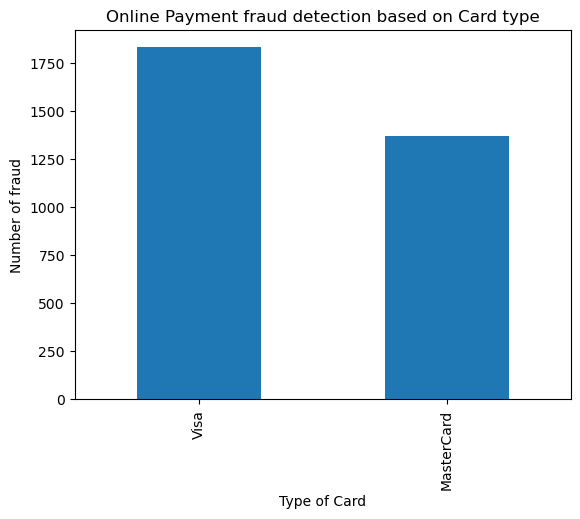

In [18]:
import matplotlib.pyplot as plt
fraud_counts = fraud_data['Type of Card'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Type of Card')
plt.ylabel('Number of fraud')
plt.title('Online Payment fraud detection based on Card type')

plt.show()

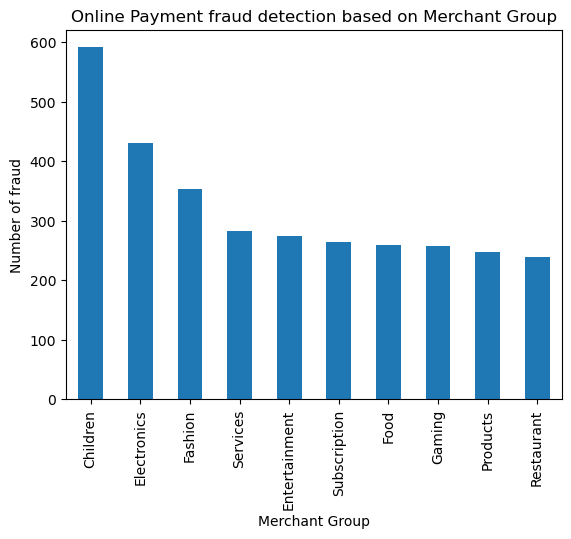

In [19]:
fraud_counts = fraud_data['Merchant Group'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Merchant Group')
plt.ylabel('Number of fraud')
plt.title('Online Payment fraud detection based on Merchant Group')

plt.show()

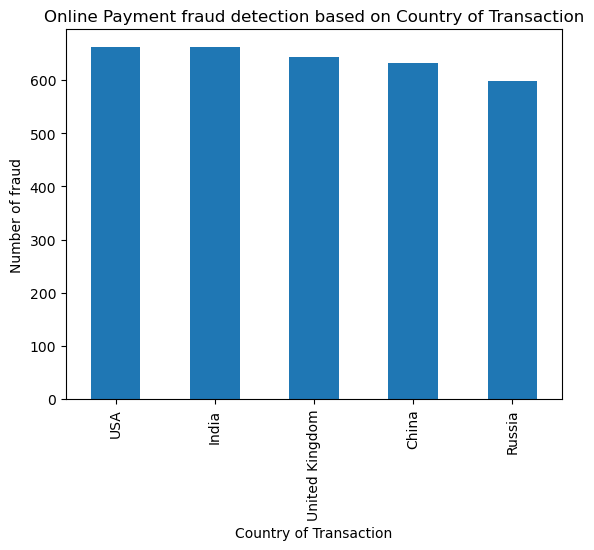

In [20]:
fraud_counts = fraud_data['Country of Transaction'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Country of Transaction')
plt.ylabel('Number of fraud')
plt.title('Online Payment fraud detection based on Country of Transaction')

plt.show()

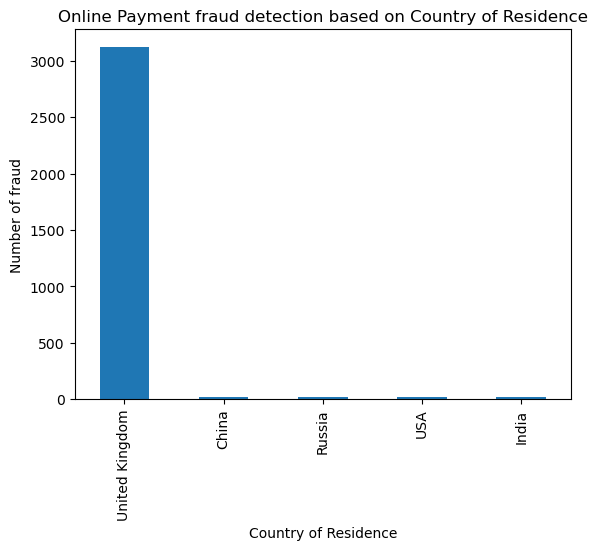

In [21]:
fraud_counts = fraud_data['Country of Residence'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Country of Residence')
plt.ylabel('Number of fraud')
plt.title('Online Payment fraud detection based on Country of Residence')

plt.show()

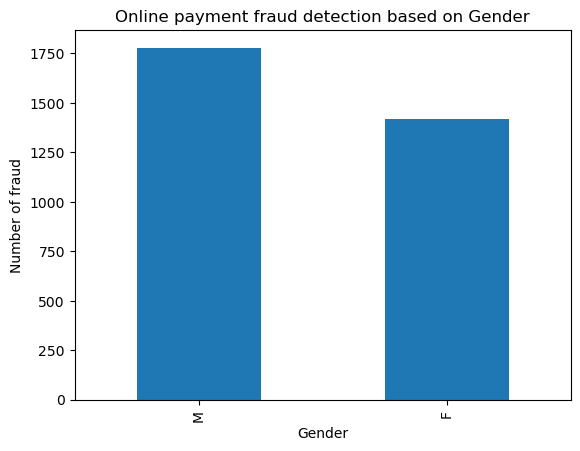

In [22]:
fraud_counts = fraud_data['Gender'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of fraud')
plt.title('Online payment fraud detection based on Gender')

plt.show()

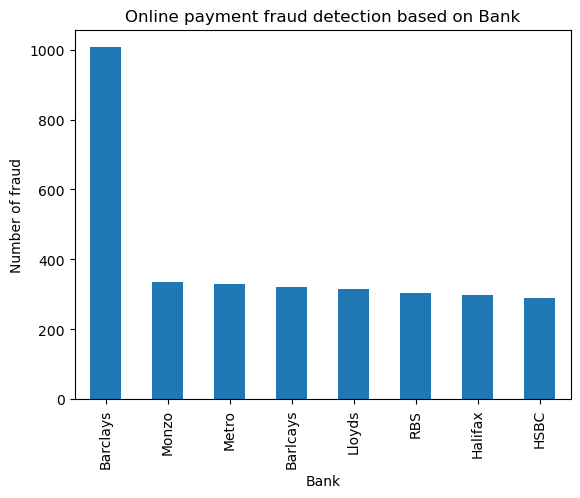

In [23]:
fraud_counts = fraud_data['Bank'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Bank')
plt.ylabel('Number of fraud')
plt.title('Online payment fraud detection based on Bank')

plt.show()

In [24]:
fraud_data['Amount'].value_counts().sum()

3199

In [25]:
online_data=online_data.drop(['Transaction ID','Date','Day of Week'],axis=1)

In [26]:
online_data.head(5)

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,23,Visa,CVC,91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
6,18,Visa,CVC,231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,18,MasterCard,CVC,154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
16,0,MasterCard,CVC,25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
17,21,Visa,CVC,242,Online,Services,United Kingdom,United Kingdom,United Kingdom,M,62.0,Barlcays,0


In [27]:
online_data['Entry Mode'].value_counts()

CVC    33470
Name: Entry Mode, dtype: int64

In [28]:
online_data['Merchant Group'].value_counts()

Children         3560
Restaurant       3415
Subscription     3378
Fashion          3335
Services         3331
Gaming           3323
Products         3306
Food             3301
Electronics      3273
Entertainment    3248
Name: Merchant Group, dtype: int64

In [29]:
online_data['Shipping Address'].value_counts()

United Kingdom    20513
USA                3329
Russia             3221
India              3214
China              3193
Name: Shipping Address, dtype: int64

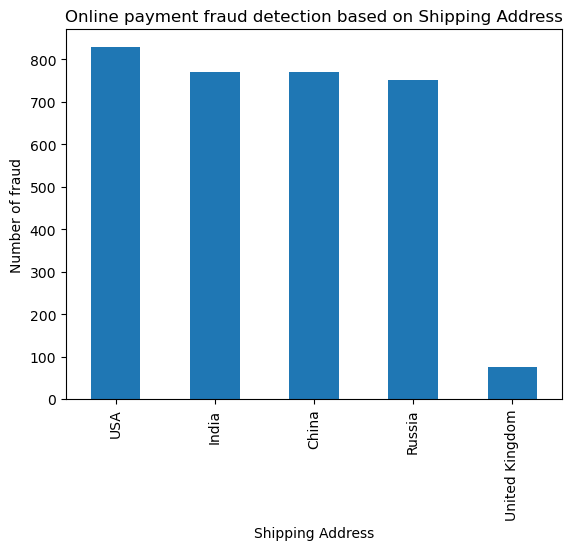

In [30]:
fraud_counts = fraud_data['Shipping Address'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Shipping Address')
plt.ylabel('Number of fraud')
plt.title('Online payment fraud detection based on Shipping Address')

plt.show()

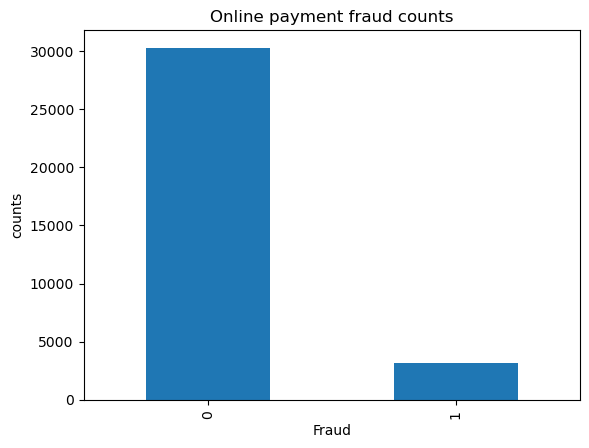

In [31]:
counts = online_data['Fraud'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Fraud')
plt.ylabel('counts')
plt.title('Online payment fraud counts')

plt.show()

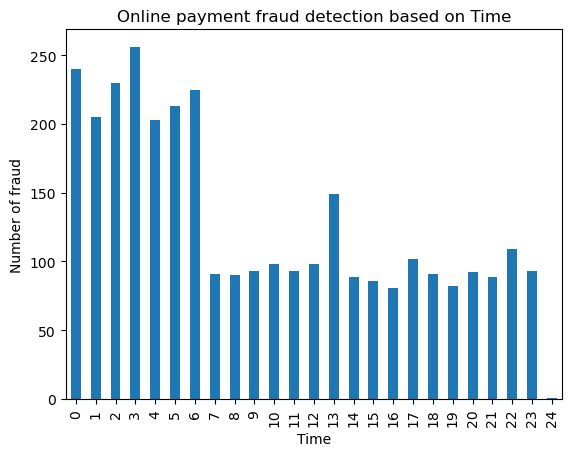

In [33]:
fraud_counts = fraud_data['Time'].value_counts()
# Sort the values by index (Time)
fraud_counts = fraud_counts.sort_index()
fraud_counts.plot(kind='bar')
plt.xlabel('Time')
plt.ylabel('Number of fraud')
plt.title('Online payment fraud detection based on Time')

plt.show()